# 12_MiniAlexNet-unsupervised-SBATCH


%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.simple_mlp_train_results import UnsupervisedMLPTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.training_results import CNNUnsupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [3]:
batch_size = 32
subset_fraction = 0.05
validation_ratio = 6
seed = 42
selected_labels = [4, 9]

train_pair_dataloader, val_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=True, subset_fraction=subset_fraction, validation_ratio=validation_ratio, seed=seed, 
    selected_labels=selected_labels
)
test_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=False, subset_fraction=subset_fraction, 
    selected_labels=selected_labels
)

device: cpu
num_workers: 1
device: cpu
num_workers: 1


In [4]:
test_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/no_prune_CNN_fast/sbatch-TEST_bs-32_sf-0.05_sl-49_vr-6_nti-5_lmd-2_m-5.0_pmt-NoPrune_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

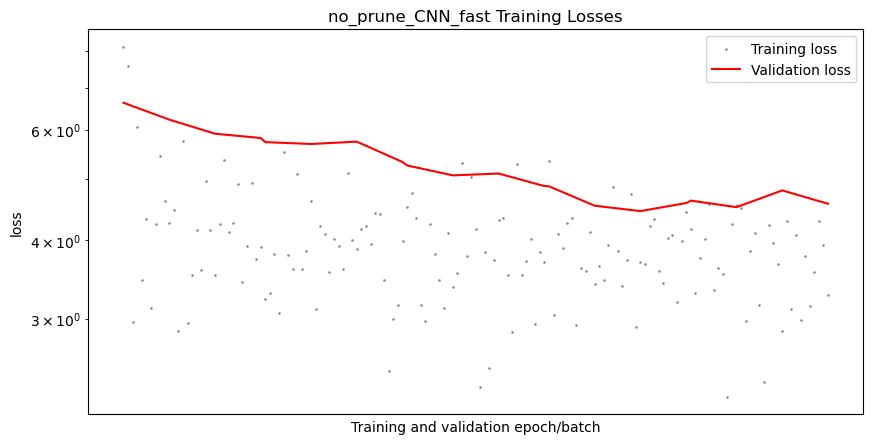

In [5]:
test_results.plot_training_losses()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

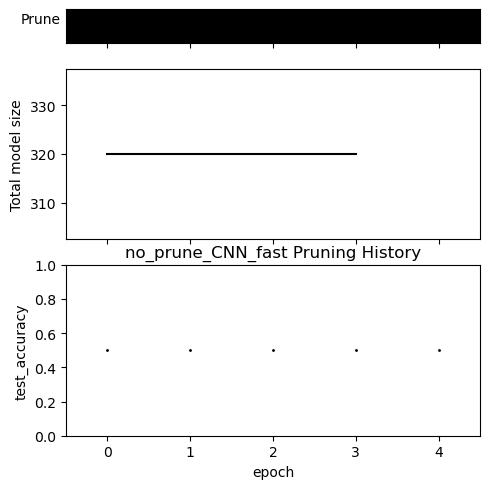

In [6]:
test_results.plot_pruning(test_err_col='test_accuracy')

In [7]:
test_results.set_trained_model(2)

In [8]:
test_results.model

DrLIMMiniAlexNet(
  (conv1): Conv2dWithActivity(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2dWithActivity(64, 256, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2304, out_features=384, bias=True)
  (fc2): Linear(in_features=384, out_features=192, bias=True)
  (fc3): Linear(in_features=192, out_features=2, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
)

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': '2D Embeddings of Image Pairs'}, xlabel='Embedding dimension 1', ylabel='Embedding dimension 2'>)

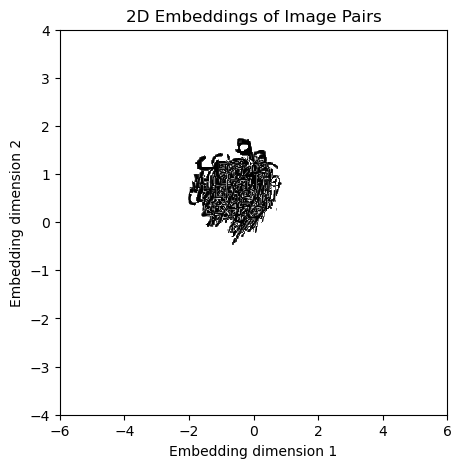

In [9]:
test_results.plot_image_embeddings(train_pair_dataloader, num_pairs_per_batch=2)

# Quick runs

```bash
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_no-prune_CNN_fast.sh 
Submitted batch job 56452014
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_activity-prune_CNN_fast.sh 
Submitted batch job 56458325
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_random-prune_CNN_fast.sh 
Submitted batch job 56458326
```

In [5]:
no_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/no_prune_CNN_fast/sbatch-56452014_bs-32_sf-0.05_sl-49_vr-6_nti-10_lmd-2_m-5.0_pmt-NoPrune_g-0.1_lr-0.001_s-4")
act_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/activity_prune_CNN_fast/sbatch-56458325_bs-32_sf-0.05_sl-49_vr-6_nti-10_lmd-2_m-5.0_pmt-Activity_g-0.1_lr-0.001_s-4")
rand_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/random_prune_CNN_fast/sbatch-56458326_bs-32_sf-0.05_sl-49_vr-6_nti-10_lmd-2_m-5.0_pmt-Random_g-0.1_lr-0.001_s-4")

## No pruning

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

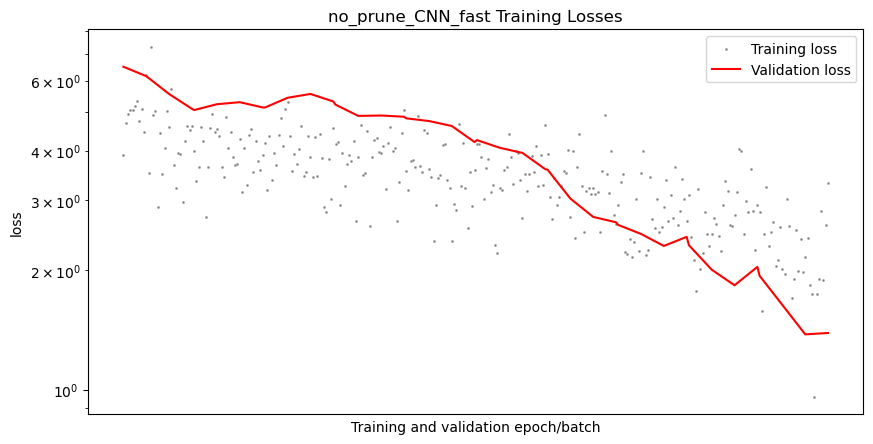

In [53]:
no_prune_results.plot_training_losses()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

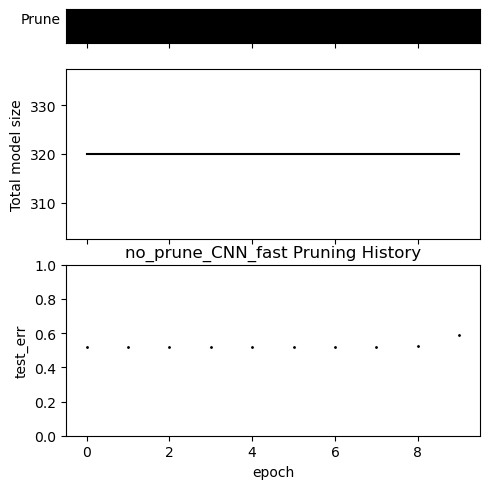

In [54]:
no_prune_results.plot_pruning()

## Activity pruning

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'activity_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

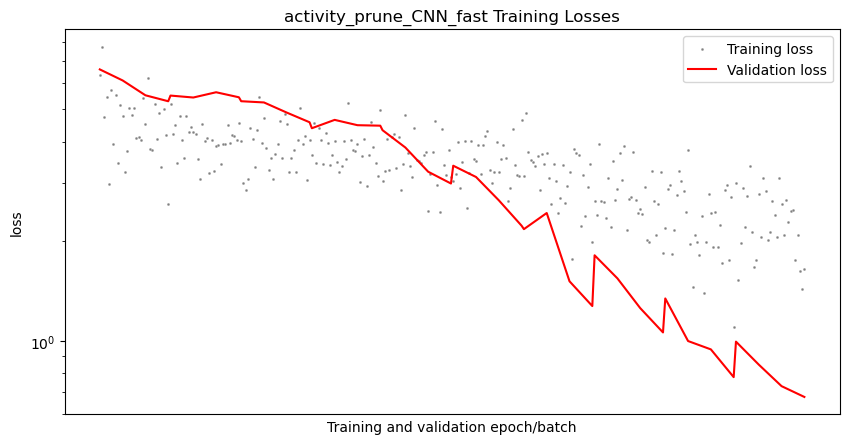

In [55]:
act_prune_results.plot_training_losses()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'activity_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

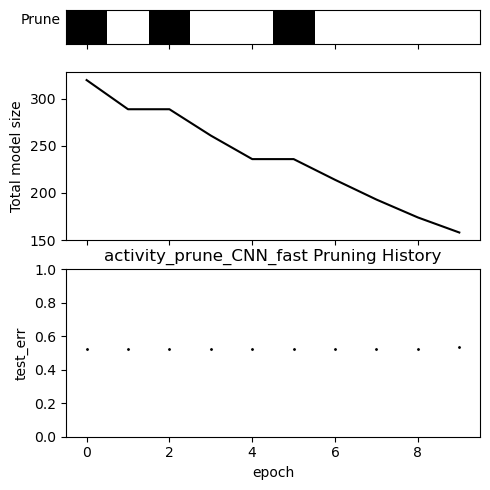

In [56]:
act_prune_results.plot_pruning()

## Random pruning

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'random_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

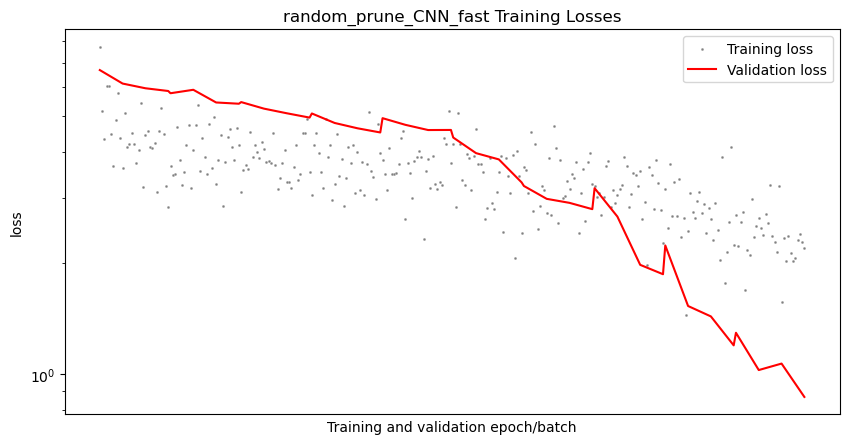

In [57]:
rand_prune_results.plot_training_losses()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'random_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

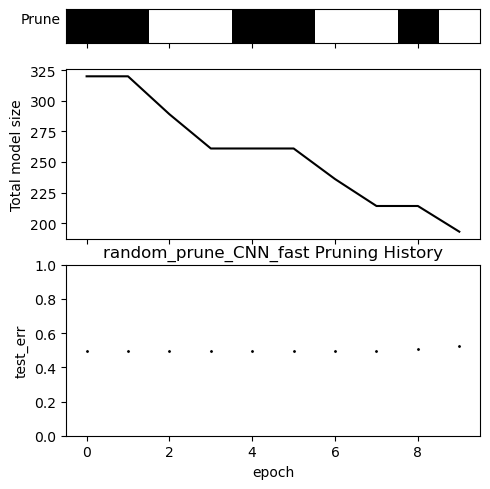

In [58]:
rand_prune_results.plot_pruning()

# Full run

Increased GPU time request
```
(klab_env) (base) [clc926@compute-e-16-236 klab_rotation]$ sbatch sbatch_scripts/12_no-prune_CNN_full.sh 
Submitted batch job 56473218
(klab_env) (base) [clc926@compute-e-16-236 klab_rotation]$ sbatch sbatch_scripts/12_activity-prune_CNN_full.sh 
sbaSubmitted batch job 56473246
(klab_env) (base) [clc926@compute-e-16-236 klab_rotation]$ sbatch sbatch_scripts/12_random-prune_CNN_full.sh 
Submitted batch job 56473248
```

In [6]:
full_no_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/no_prune_CNN_full/sbatch-56473218_bs-32_sf-0.1_sl-49_vr-6_nti-250_lmd-2_m-5.0_pmt-NoPrune_g-0.1_lr-0.001_s-4")
full_act_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/activity_prune_CNN_full/sbatch-56473246_bs-32_sf-0.1_sl-49_vr-6_nti-250_lmd-2_m-5.0_pmt-Activity_g-0.1_lr-0.001_s-4")
full_rand_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/random_prune_CNN_full/sbatch-56473248_bs-32_sf-0.1_sl-49_vr-6_nti-250_lmd-2_m-5.0_pmt-Random_g-0.1_lr-0.001_s-4")

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

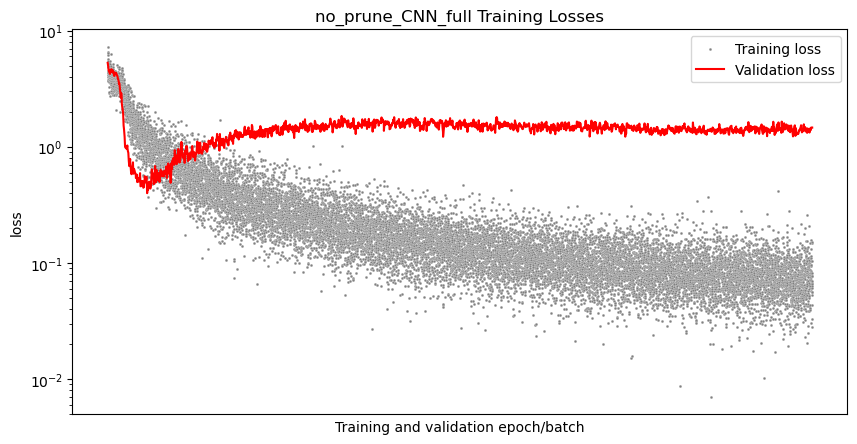

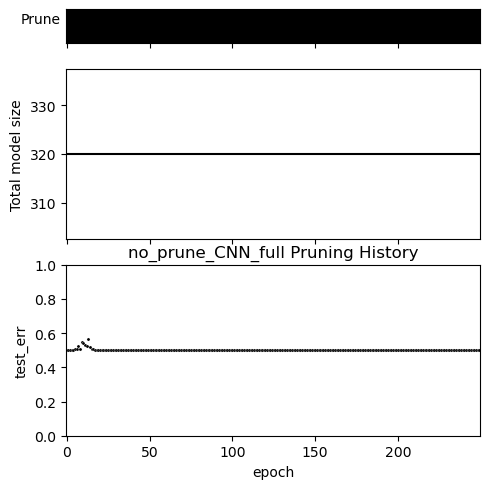

In [7]:
full_no_prune_results.plot_training_losses()
full_no_prune_results.plot_pruning()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'activity_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

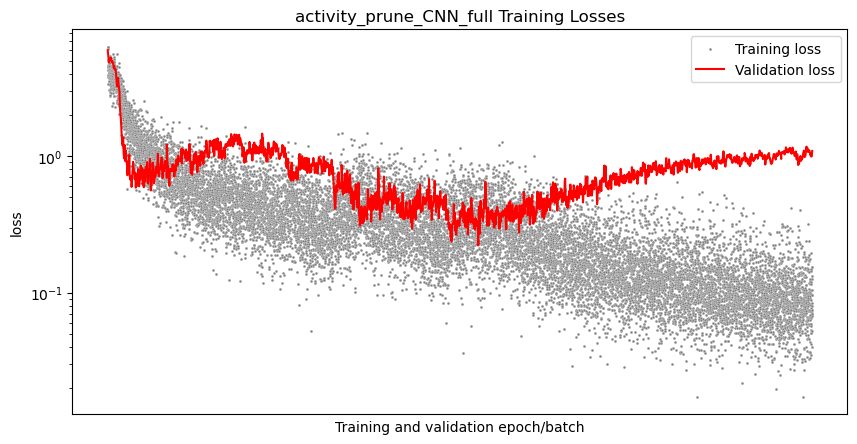

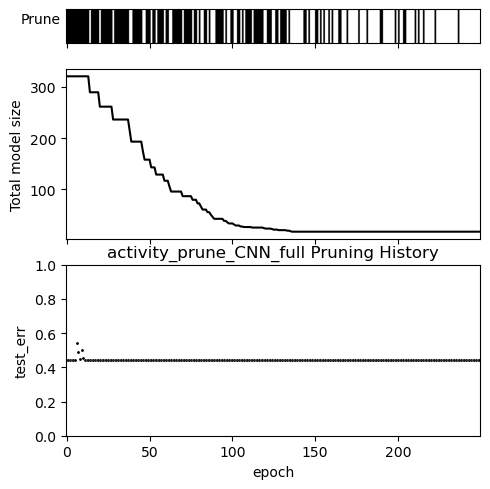

In [8]:
full_act_prune_results.plot_training_losses()
full_act_prune_results.plot_pruning()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'random_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

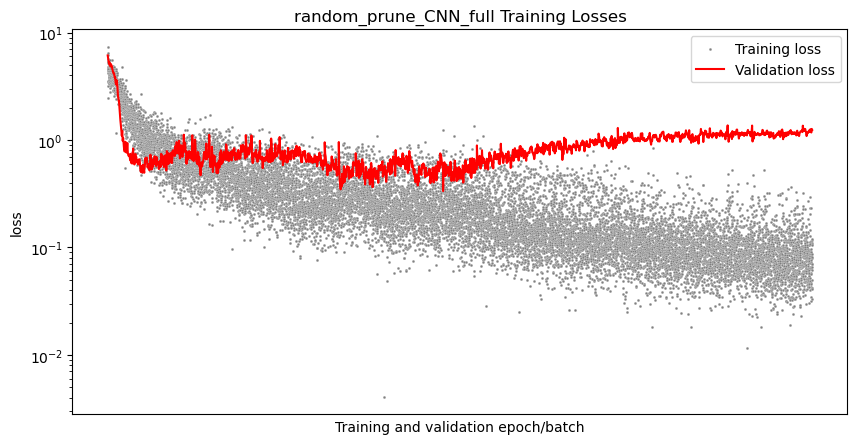

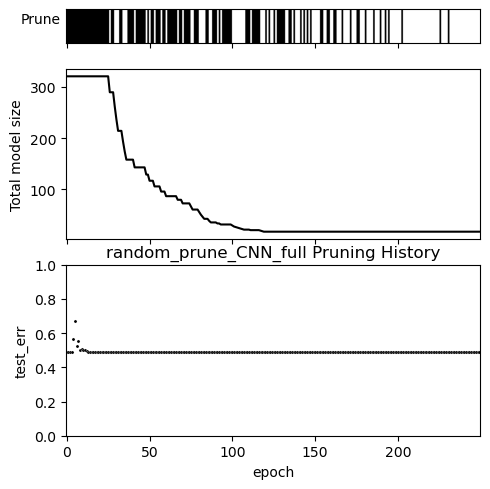

In [9]:
full_rand_prune_results.plot_training_losses()
full_rand_prune_results.plot_pruning()